In [122]:
# Import with pandas 
import pandas as pd
# Parse dates 
df = pd.read_csv("/content/dataset.csv", 
                 parse_dates=["Date"],index_col=0 )
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...
2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039


In [123]:
# Descriptive Statistics 
df[['High','Low','Open','Close']].describe()

,High,Low,Open,Close
count,1825.000000,1825.000000,1825.000000,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284
std,409.680853,404.310068,407.169994,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912


In [124]:
pip install mplfinance

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:46: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


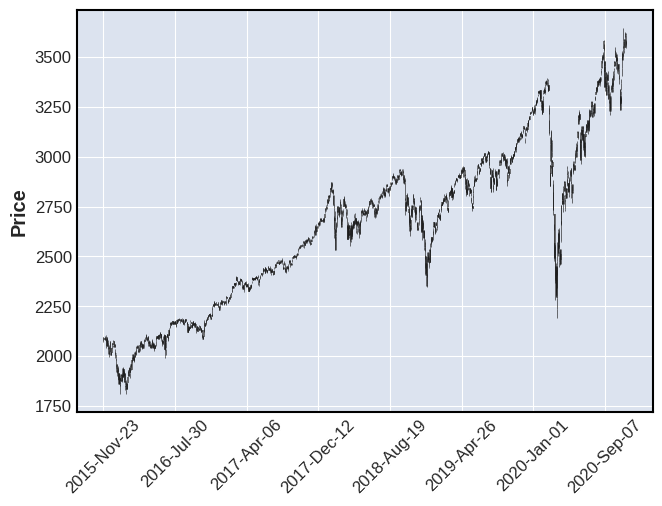

In [125]:
# plot stock price as japanese candlesticks
import mplfinance as mpf

mpf.plot(df, type='candle')

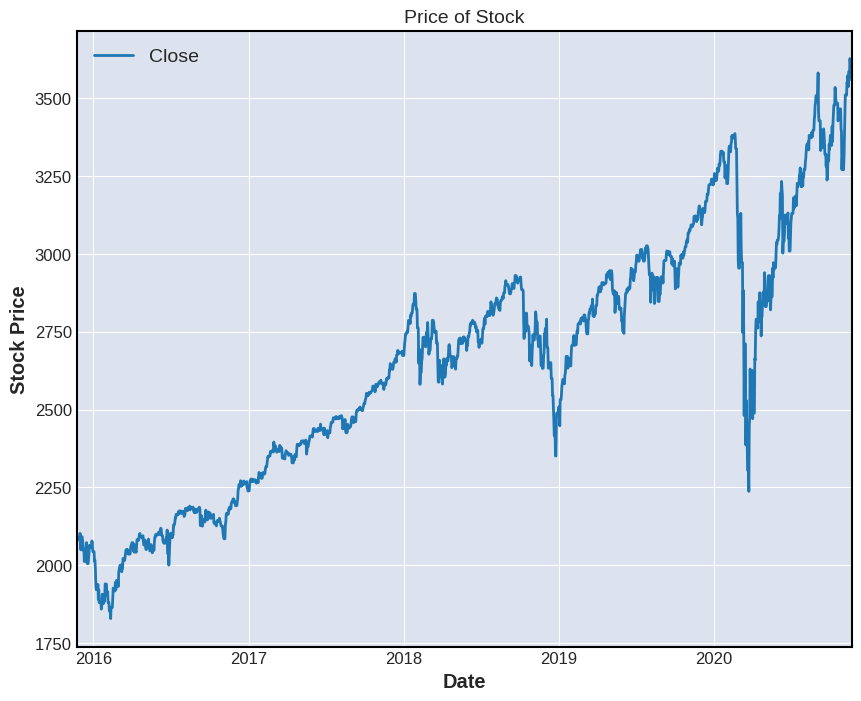

In [126]:
# plot dataset that we will use, for data we use only Close price 
import matplotlib.pyplot as plt
data = df[['Close']]
data.plot(figsize=(10, 8))
plt.ylabel("Stock Price")
plt.title("Price of Stock", fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [127]:
timesteps = data.index.to_numpy()
prices = data["Close"].to_numpy()

timesteps[:10], prices[:10]

(array(['2015-11-23T00:00:00.000000000', '2015-11-24T00:00:00.000000000',
        '2015-11-25T00:00:00.000000000', '2015-11-26T00:00:00.000000000',
        '2015-11-27T00:00:00.000000000', '2015-11-28T00:00:00.000000000',
        '2015-11-29T00:00:00.000000000', '2015-11-30T00:00:00.000000000',
        '2015-12-01T00:00:00.000000000', '2015-12-02T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([2086.59008789, 2089.13989258, 2088.87011719, 2088.87011719,
        2090.11010742, 2090.11010742, 2090.11010742, 2080.40991211,
        2102.62988281, 2079.51000977]))

In [128]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1460, 365, 1460, 365)

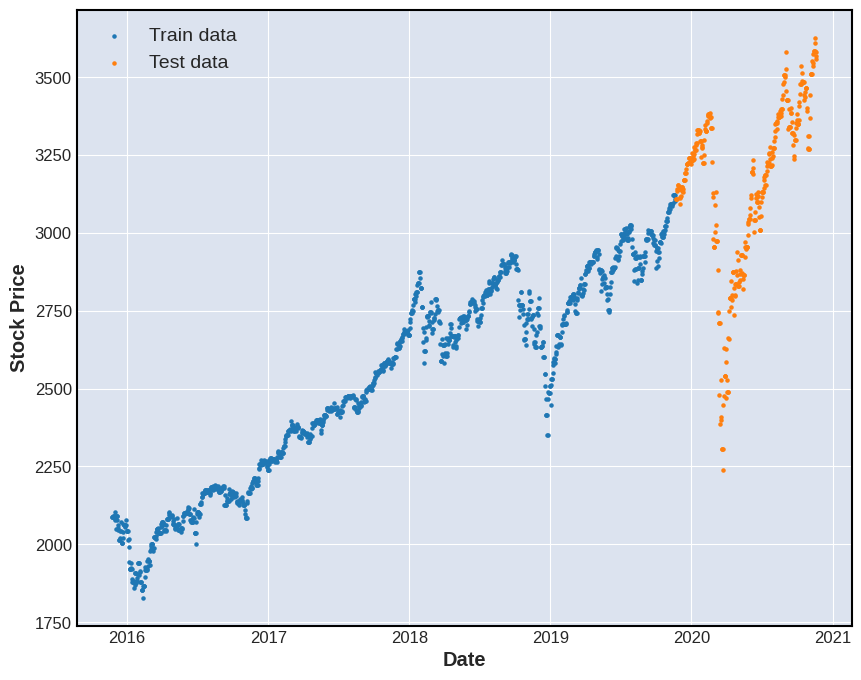

In [129]:
# Plot correctly made splits
plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend(fontsize=14)
plt.show()

In [130]:
# Load the dataset
dataset = data.values
print(dataset)
print(dataset.shape)

[[2086.59008789]
 [2089.13989258]
 [2088.87011719]
 ...
 [3567.79003906]
 [3581.87011719]
 [3557.54003906]]
(1825, 1)


In [131]:
# Normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset)
print(dataset.shape)

[[0.14323386]
 [0.14465213]
 [0.14450208]
 ...
 [0.96711598]
 [0.97494769]
 [0.96141466]]
(1825, 1)


In [132]:
# Split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [133]:
import numpy as np

# Function for dataset creating
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        #takes 
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [134]:
# Reshape into X=t and Y=t+1
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [135]:
# Reshape input to be [samples, time steps, features].
trainX = np.reshape(trainX, (trainX.shape[0], 1,
                             trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,
                           testX.shape[1]))

In [136]:
# Reshape input to be [samples, time steps, features].
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

In [137]:
import keras
import math
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [138]:
model = Sequential()

model.add(LSTM(512, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(256))
model.add(Dense(1))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 512)            1064960   
                                                                 
 lstm_11 (LSTM)              (None, 256)               787456    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,852,673
Trainable params: 1,852,673
Non-trainable params: 0
_________________________________________________________________
None


In [139]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY,
                    epochs=10, verbose=2,
                    shuffle=False, batch_size=25)

Epoch 1/10
59/59 - 5s - loss: 0.0022 - 5s/epoch - 86ms/step
Epoch 2/10
59/59 - 1s - loss: 0.0024 - 1s/epoch - 20ms/step
Epoch 3/10
59/59 - 1s - loss: 7.1842e-04 - 1s/epoch - 19ms/step
Epoch 4/10
59/59 - 1s - loss: 3.3288e-04 - 1s/epoch - 19ms/step
Epoch 5/10
59/59 - 1s - loss: 3.2713e-04 - 1s/epoch - 20ms/step
Epoch 6/10
59/59 - 1s - loss: 3.3424e-04 - 1s/epoch - 19ms/step
Epoch 7/10
59/59 - 1s - loss: 3.8380e-04 - 1s/epoch - 20ms/step
Epoch 8/10
59/59 - 1s - loss: 3.3759e-04 - 1s/epoch - 20ms/step
Epoch 9/10
59/59 - 1s - loss: 3.7183e-04 - 1s/epoch - 19ms/step
Epoch 10/10
59/59 - 1s - loss: 3.4489e-04 - 1s/epoch - 19ms/step


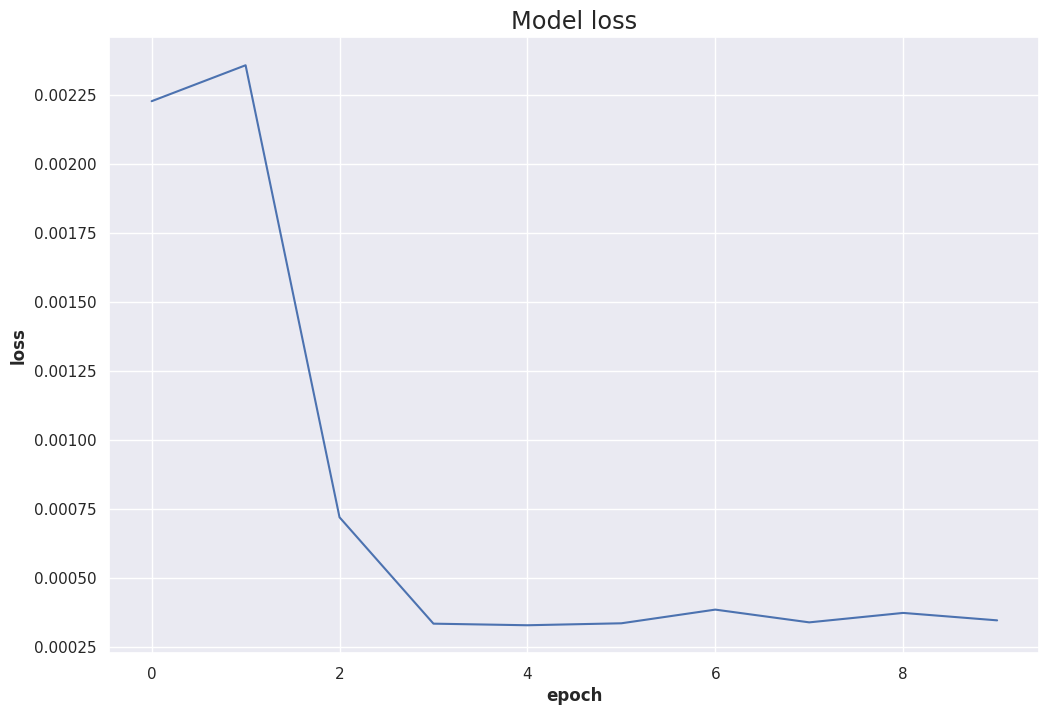

In [140]:
# summarize history for loss
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8), 'axes.titlesize':'x-large'})
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [141]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(trainPredict[:10])
print(testPredict[:10])

[[0.1674343 ]
 [0.16631114]
 [0.16833603]
 [0.16677064]
 [0.16149576]
 [0.16275206]
 [0.1634221 ]
 [0.16455017]
 [0.1639176 ]
 [0.16012031]]
[[0.7514712 ]
 [0.7527334 ]
 [0.7538435 ]
 [0.754655  ]
 [0.7515413 ]
 [0.7464649 ]
 [0.74393624]
 [0.74228495]
 [0.7449011 ]
 [0.7470018 ]]


In [142]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)


In [143]:
trainY = scaler.inverse_transform(trainY)


In [144]:
testPredict = scaler.inverse_transform(testPredict)


In [145]:
testY = scaler.inverse_transform(testY)

In [146]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 63.16 RMSE
Test Score: 78.52 RMSE


In [147]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 8), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

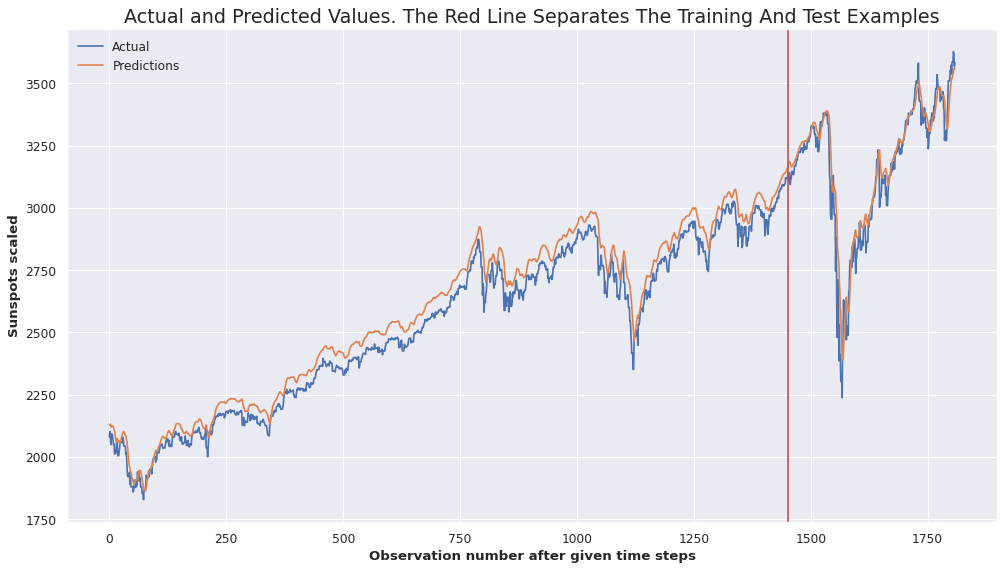

In [148]:
#Plot result
plot_result(trainY, testY, trainPredict, testPredict)

In [149]:
# Reshape into X=t and Y=t+1
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [150]:
# Reshape input to be [samples, time steps, features].
trainX = np.reshape(trainX, (trainX.shape[0], 1,
                             trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,
                           testX.shape[1]))

In [151]:
# Reshape input to be [samples, time steps, features].
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

In [152]:
model_1 = Sequential()

model_1.add(LSTM(512, return_sequences=True,input_shape=(1, look_back)))
model_1.add(LSTM(256))
model_1.add(Dense(1))

print(model_1.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 512)            1058816   
                                                                 
 lstm_13 (LSTM)              (None, 256)               787456    
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,846,529
Trainable params: 1,846,529
Non-trainable params: 0
_________________________________________________________________
None


In [153]:
model_1.compile(loss='mean_squared_error', optimizer='adam')
history = model_1.fit(trainX, trainY,
                    epochs=10, verbose=2,
                    shuffle=False, batch_size=25)

Epoch 1/10
59/59 - 7s - loss: 0.0023 - 7s/epoch - 126ms/step
Epoch 2/10
59/59 - 2s - loss: 0.0036 - 2s/epoch - 37ms/step
Epoch 3/10
59/59 - 2s - loss: 0.0024 - 2s/epoch - 35ms/step
Epoch 4/10
59/59 - 2s - loss: 0.0015 - 2s/epoch - 36ms/step
Epoch 5/10
59/59 - 2s - loss: 9.0592e-04 - 2s/epoch - 39ms/step
Epoch 6/10
59/59 - 2s - loss: 4.3037e-04 - 2s/epoch - 40ms/step
Epoch 7/10
59/59 - 2s - loss: 2.2156e-04 - 2s/epoch - 33ms/step
Epoch 8/10
59/59 - 2s - loss: 2.5645e-04 - 2s/epoch - 35ms/step
Epoch 9/10
59/59 - 2s - loss: 2.7080e-04 - 2s/epoch - 38ms/step
Epoch 10/10
59/59 - 2s - loss: 2.5976e-04 - 2s/epoch - 40ms/step


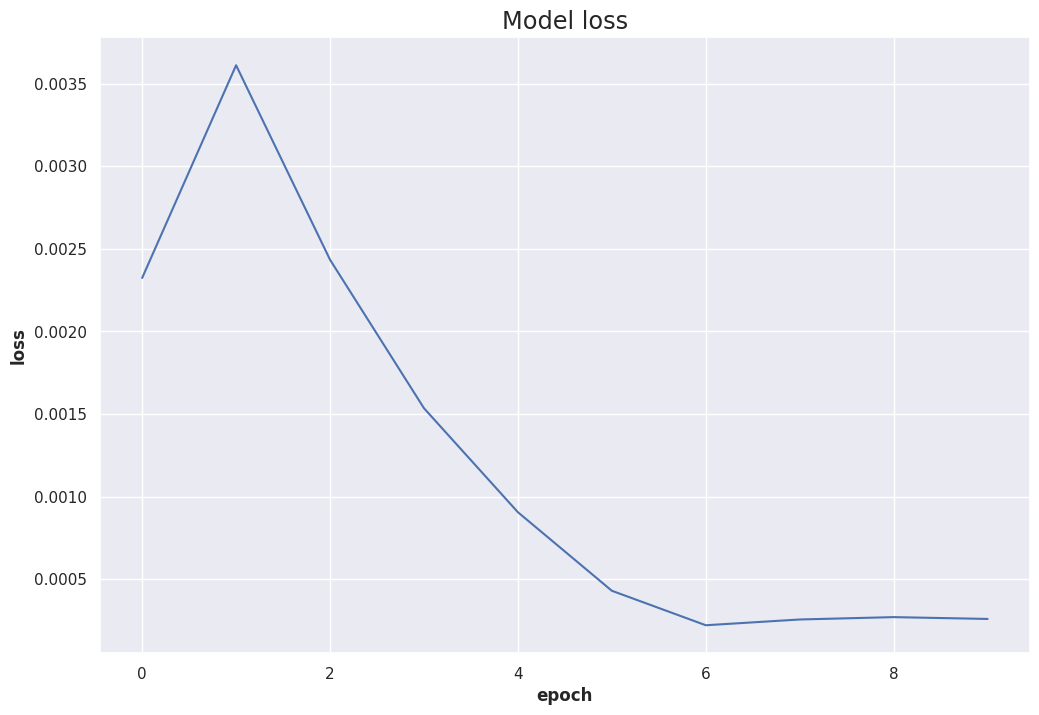

In [154]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [155]:
trainPredict = model_1.predict(trainX)
testPredict = model_1.predict(testX)

In [156]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)


In [157]:
trainY = scaler.inverse_transform(trainY)


In [158]:
testPredict = scaler.inverse_transform(testPredict)


In [159]:
testY = scaler.inverse_transform(testY)

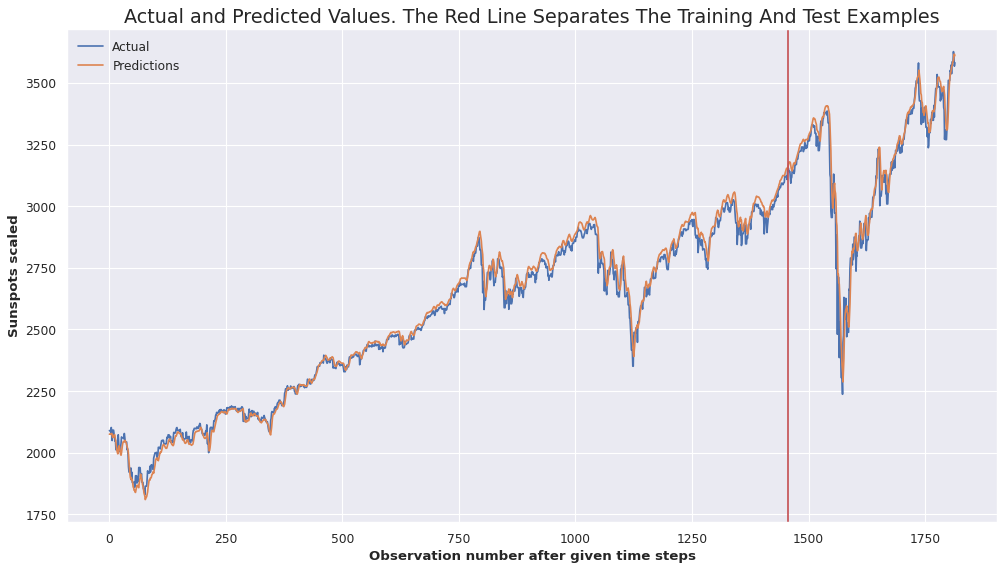

In [160]:
#Plot result
plot_result(trainY, testY, trainPredict, testPredict)

In [161]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 31.18 RMSE
Test Score: 65.50 RMSE


In [162]:
# Reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [163]:
# Reshape input to be [samples, time steps, features].
trainX = np.reshape(trainX, (trainX.shape[0], 1,
                             trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,
                           testX.shape[1]))

In [164]:
# Reshape input to be [samples, time steps, features].
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

In [165]:
model_2 = Sequential()

model_2.add(LSTM(512, return_sequences=True,input_shape=(1, look_back)))
model_2.add(LSTM(256))
model_2.add(Dense(1))

print(model_2.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 1, 512)            1060864   
                                                                 
 lstm_15 (LSTM)              (None, 256)               787456    
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,848,577
Trainable params: 1,848,577
Non-trainable params: 0
_________________________________________________________________
None


In [166]:
model_2.compile(loss='mean_squared_error', optimizer='adam')
history = model_2.fit(trainX, trainY,
                    epochs=10, verbose=2,
                    shuffle=False, batch_size=25)

Epoch 1/10
59/59 - 8s - loss: 0.0023 - 8s/epoch - 132ms/step
Epoch 2/10
59/59 - 1s - loss: 0.0030 - 1s/epoch - 20ms/step
Epoch 3/10
59/59 - 1s - loss: 0.0014 - 1s/epoch - 20ms/step
Epoch 4/10
59/59 - 1s - loss: 4.6815e-04 - 1s/epoch - 20ms/step
Epoch 5/10
59/59 - 1s - loss: 2.6766e-04 - 1s/epoch - 20ms/step
Epoch 6/10
59/59 - 2s - loss: 2.5709e-04 - 2s/epoch - 29ms/step
Epoch 7/10
59/59 - 2s - loss: 2.3251e-04 - 2s/epoch - 34ms/step
Epoch 8/10
59/59 - 2s - loss: 2.2837e-04 - 2s/epoch - 36ms/step
Epoch 9/10
59/59 - 2s - loss: 2.3914e-04 - 2s/epoch - 34ms/step
Epoch 10/10
59/59 - 2s - loss: 2.3936e-04 - 2s/epoch - 37ms/step


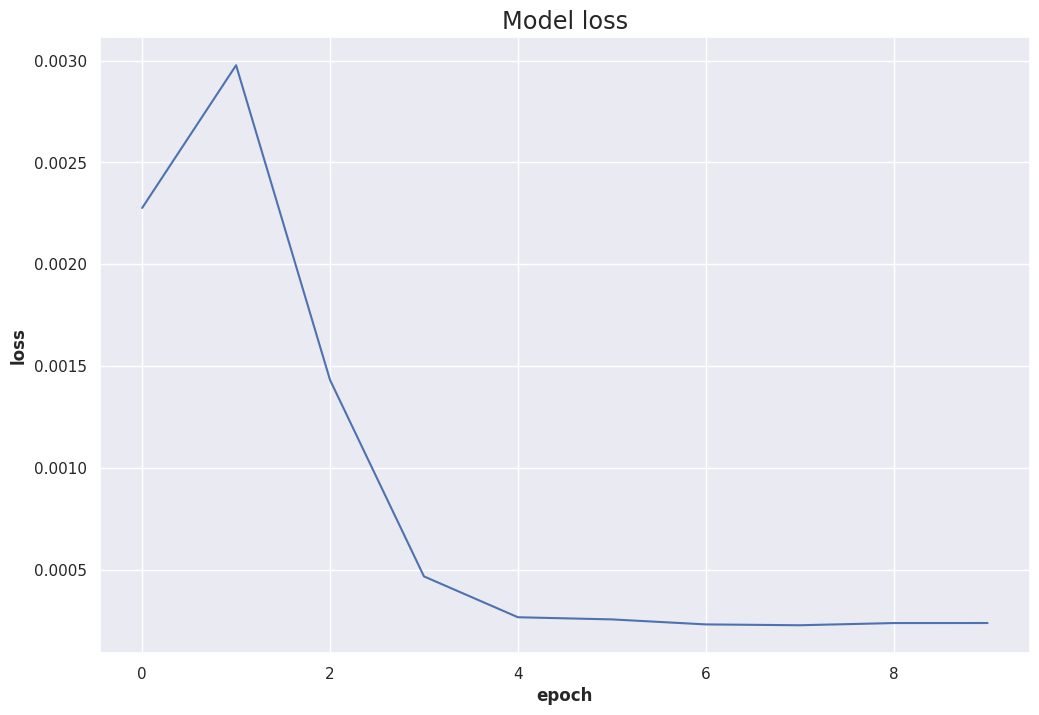

In [167]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [168]:
trainPredict = model_2.predict(trainX)
testPredict = model_2.predict(testX)

In [169]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)


In [170]:
trainY = scaler.inverse_transform(trainY)


In [171]:
testPredict = scaler.inverse_transform(testPredict)


In [172]:
testY = scaler.inverse_transform(testY)

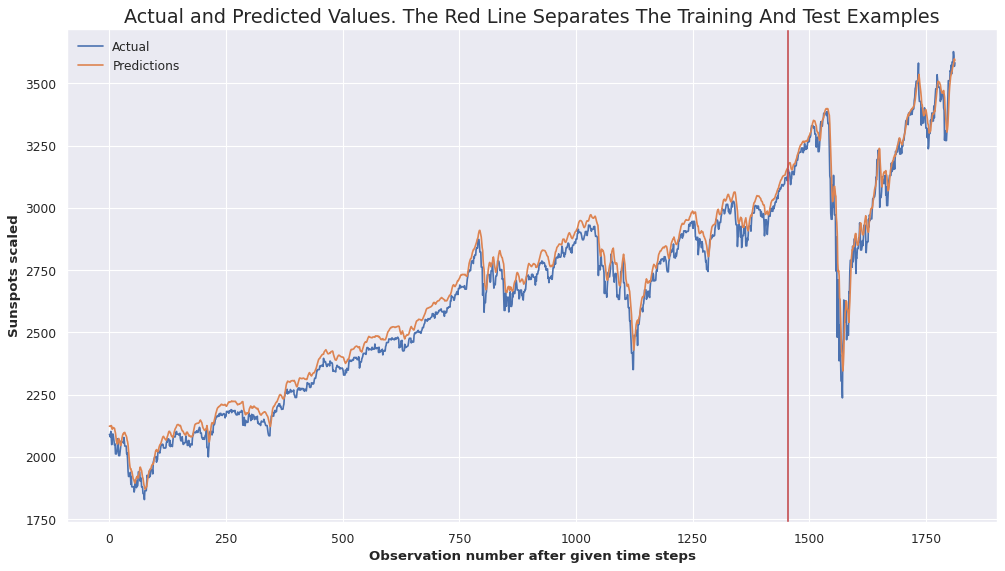

In [173]:
#Plot result
plot_result(trainY, testY, trainPredict, testPredict)

In [174]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 47.98 RMSE
Test Score: 69.56 RMSE


In [175]:
# Reshape into X=t and Y=t+1
look_back = 6
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [176]:
# Reshape input to be [samples, time steps, features].
trainX = np.reshape(trainX, (trainX.shape[0], 1,
                             trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,
                           testX.shape[1]))

In [177]:
# Reshape input to be [samples, time steps, features].
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

In [178]:
model_3 = Sequential()

model_3.add(LSTM(512, return_sequences=True,input_shape=(1, look_back)))
model_3.add(LSTM(256))
model_3.add(Dense(1))

print(model_3.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 512)            1062912   
                                                                 
 lstm_17 (LSTM)              (None, 256)               787456    
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,850,625
Trainable params: 1,850,625
Non-trainable params: 0
_________________________________________________________________
None


In [179]:
model_3.compile(loss='mean_squared_error', optimizer='adam')
history = model_3.fit(trainX, trainY,
                    epochs=10, verbose=2,
                    shuffle=False, batch_size=25)

Epoch 1/10
59/59 - 5s - loss: 0.0022 - 5s/epoch - 77ms/step
Epoch 2/10
59/59 - 1s - loss: 0.0025 - 1s/epoch - 19ms/step
Epoch 3/10
59/59 - 1s - loss: 8.7906e-04 - 1s/epoch - 20ms/step
Epoch 4/10
59/59 - 1s - loss: 2.9669e-04 - 1s/epoch - 20ms/step
Epoch 5/10
59/59 - 1s - loss: 2.7534e-04 - 1s/epoch - 20ms/step
Epoch 6/10
59/59 - 1s - loss: 2.7132e-04 - 1s/epoch - 20ms/step
Epoch 7/10
59/59 - 1s - loss: 2.7916e-04 - 1s/epoch - 20ms/step
Epoch 8/10
59/59 - 1s - loss: 3.0805e-04 - 1s/epoch - 20ms/step
Epoch 9/10
59/59 - 1s - loss: 3.1102e-04 - 1s/epoch - 20ms/step
Epoch 10/10
59/59 - 1s - loss: 3.2389e-04 - 1s/epoch - 20ms/step


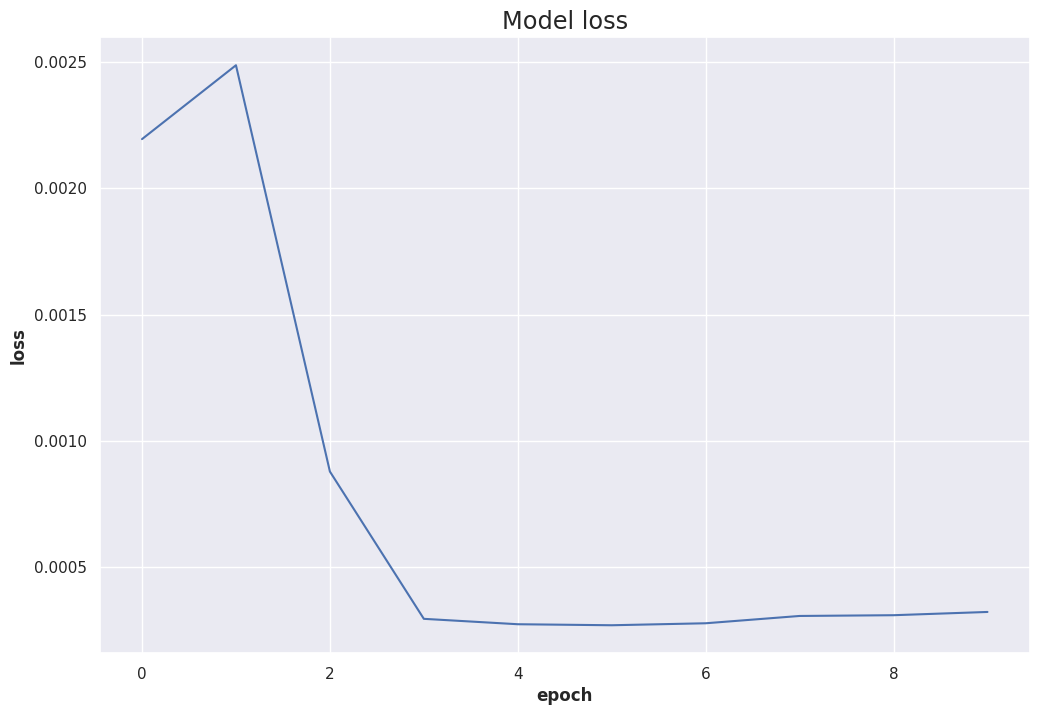

In [180]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [181]:
trainPredict = model_3.predict(trainX)
testPredict = model_3.predict(testX)

In [182]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)


In [183]:
trainY = scaler.inverse_transform(trainY)


In [184]:
testPredict = scaler.inverse_transform(testPredict)


In [185]:
testY = scaler.inverse_transform(testY)

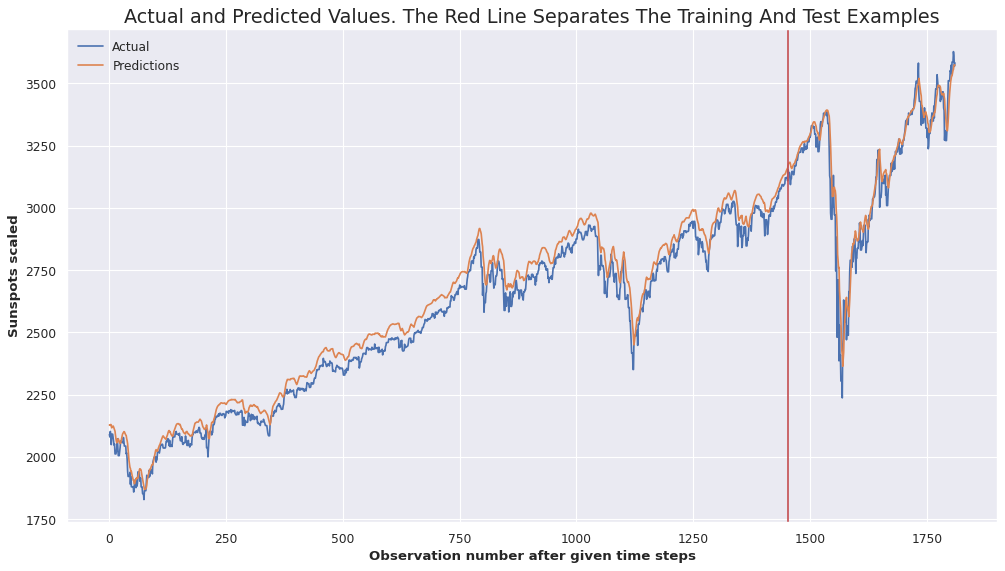

In [186]:
#Plot result
plot_result(trainY, testY, trainPredict, testPredict)

In [187]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 56.38 RMSE
Test Score: 74.23 RMSE


In [188]:
# Reshape into X=t and Y=t+1
look_back = 8
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [189]:
# Reshape input to be [samples, time steps, features].
trainX = np.reshape(trainX, (trainX.shape[0], 1,
                             trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,
                           testX.shape[1]))

In [190]:
# Reshape input to be [samples, time steps, features].
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

In [191]:
model_4 = Sequential()

model_4.add(LSTM(512, return_sequences=True,input_shape=(1, look_back)))
model_4.add(LSTM(256))
model_4.add(Dense(1))

print(model_4.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 1, 512)            1067008   
                                                                 
 lstm_19 (LSTM)              (None, 256)               787456    
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,854,721
Trainable params: 1,854,721
Non-trainable params: 0
_________________________________________________________________
None


In [192]:
model_4.compile(loss='mean_squared_error', optimizer='adam')
history = model_4.fit(trainX, trainY,
                    epochs=10, verbose=2,
                    shuffle=False, batch_size=25)

Epoch 1/10
59/59 - 5s - loss: 0.0022 - 5s/epoch - 90ms/step
Epoch 2/10
59/59 - 1s - loss: 0.0022 - 1s/epoch - 20ms/step
Epoch 3/10
59/59 - 1s - loss: 6.5007e-04 - 1s/epoch - 20ms/step
Epoch 4/10
59/59 - 1s - loss: 3.9749e-04 - 1s/epoch - 19ms/step
Epoch 5/10
59/59 - 1s - loss: 4.0872e-04 - 1s/epoch - 20ms/step
Epoch 6/10
59/59 - 1s - loss: 4.0480e-04 - 1s/epoch - 19ms/step
Epoch 7/10
59/59 - 1s - loss: 4.6291e-04 - 1s/epoch - 19ms/step
Epoch 8/10
59/59 - 1s - loss: 3.8004e-04 - 1s/epoch - 19ms/step
Epoch 9/10
59/59 - 1s - loss: 4.0732e-04 - 1s/epoch - 19ms/step
Epoch 10/10
59/59 - 1s - loss: 3.6988e-04 - 1s/epoch - 20ms/step


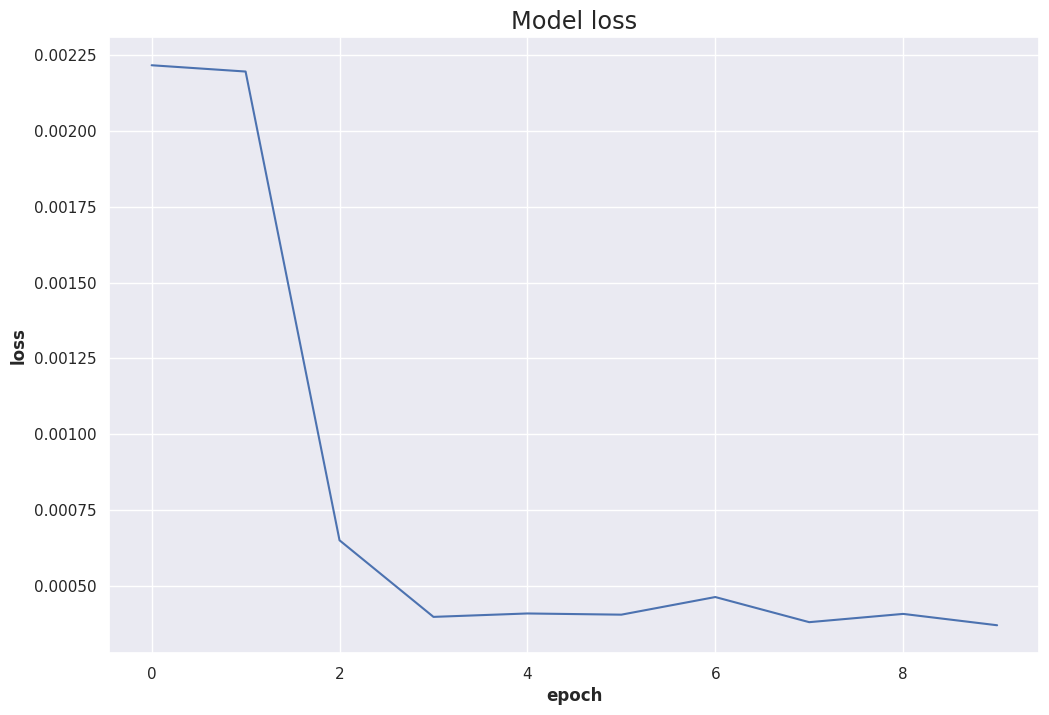

In [193]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [194]:
trainPredict = model_4.predict(trainX)
testPredict = model_4.predict(testX)

In [195]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)


In [196]:
trainY = scaler.inverse_transform(trainY)


In [197]:
testPredict = scaler.inverse_transform(testPredict)


In [198]:
testY = scaler.inverse_transform(testY)

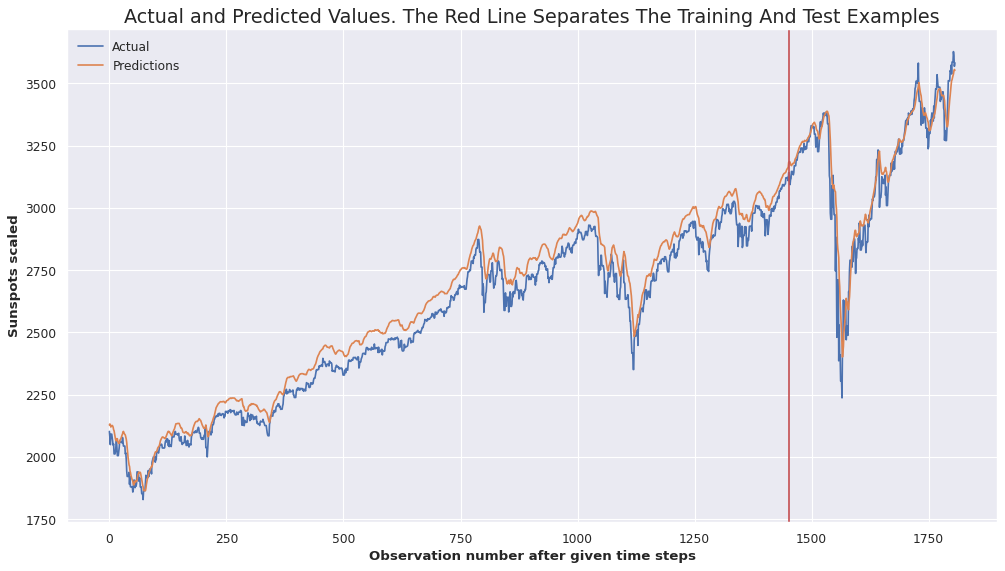

In [199]:
#Plot result
plot_result(trainY, testY, trainPredict, testPredict)

In [200]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 67.09 RMSE
Test Score: 82.36 RMSE


In [201]:
# Reshape into X=t and Y=t+1
look_back = 9
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [202]:
# Reshape input to be [samples, time steps, features].
trainX = np.reshape(trainX, (trainX.shape[0], 1,
                             trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,
                           testX.shape[1]))

In [203]:
# Reshape input to be [samples, time steps, features].
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

In [204]:
model_5 = Sequential()

model_5.add(LSTM(512, return_sequences=True,input_shape=(1, look_back)))
model_5.add(LSTM(256))
model_5.add(Dense(1))

print(model_5.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 1, 512)            1069056   
                                                                 
 lstm_21 (LSTM)              (None, 256)               787456    
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,856,769
Trainable params: 1,856,769
Non-trainable params: 0
_________________________________________________________________
None


In [205]:
model_5.compile(loss='mean_squared_error', optimizer='adam')
history = model_5.fit(trainX, trainY,
                    epochs=10, verbose=2,
                    shuffle=False, batch_size=25)

Epoch 1/10
58/58 - 4s - loss: 0.0023 - 4s/epoch - 70ms/step
Epoch 2/10
58/58 - 1s - loss: 0.0020 - 1s/epoch - 19ms/step
Epoch 3/10
58/58 - 1s - loss: 9.2018e-04 - 1s/epoch - 19ms/step
Epoch 4/10
58/58 - 1s - loss: 4.6034e-04 - 1s/epoch - 19ms/step
Epoch 5/10
58/58 - 1s - loss: 4.0756e-04 - 1s/epoch - 19ms/step
Epoch 6/10
58/58 - 1s - loss: 4.0998e-04 - 1s/epoch - 19ms/step
Epoch 7/10
58/58 - 1s - loss: 3.7335e-04 - 1s/epoch - 18ms/step
Epoch 8/10
58/58 - 1s - loss: 4.1740e-04 - 1s/epoch - 19ms/step
Epoch 9/10
58/58 - 1s - loss: 3.6844e-04 - 1s/epoch - 18ms/step
Epoch 10/10
58/58 - 1s - loss: 4.1363e-04 - 1s/epoch - 19ms/step


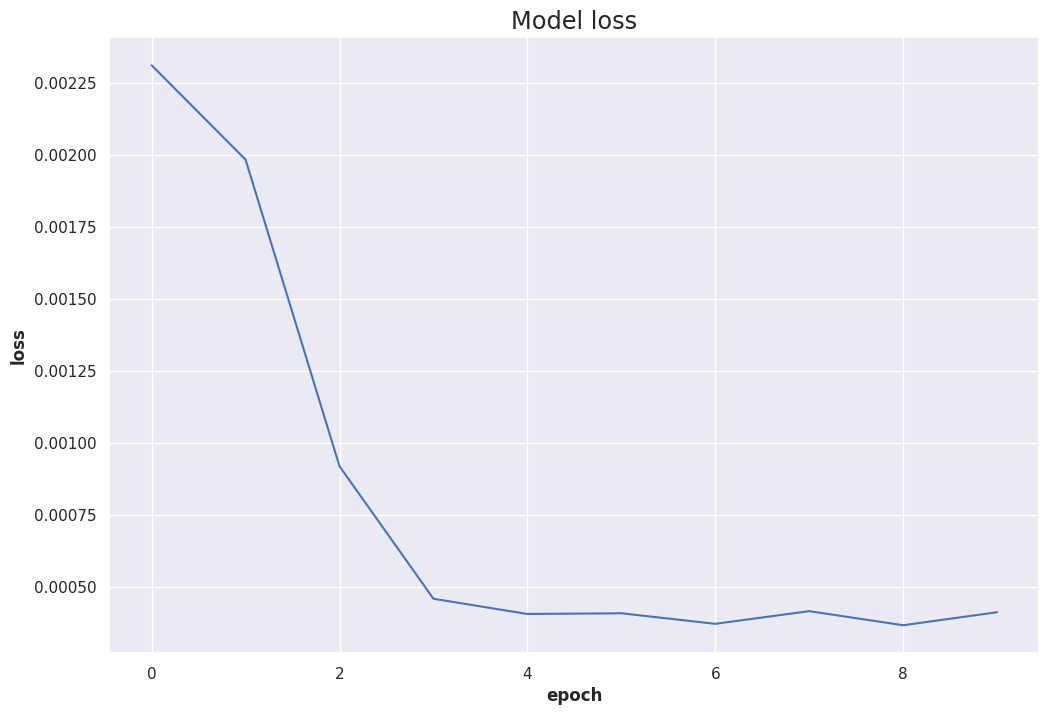

In [206]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [207]:
trainPredict = model_5.predict(trainX)
testPredict = model_5.predict(testX)

In [208]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)


In [209]:
trainY = scaler.inverse_transform(trainY)


In [210]:
testPredict = scaler.inverse_transform(testPredict)


In [211]:
testY = scaler.inverse_transform(testY)

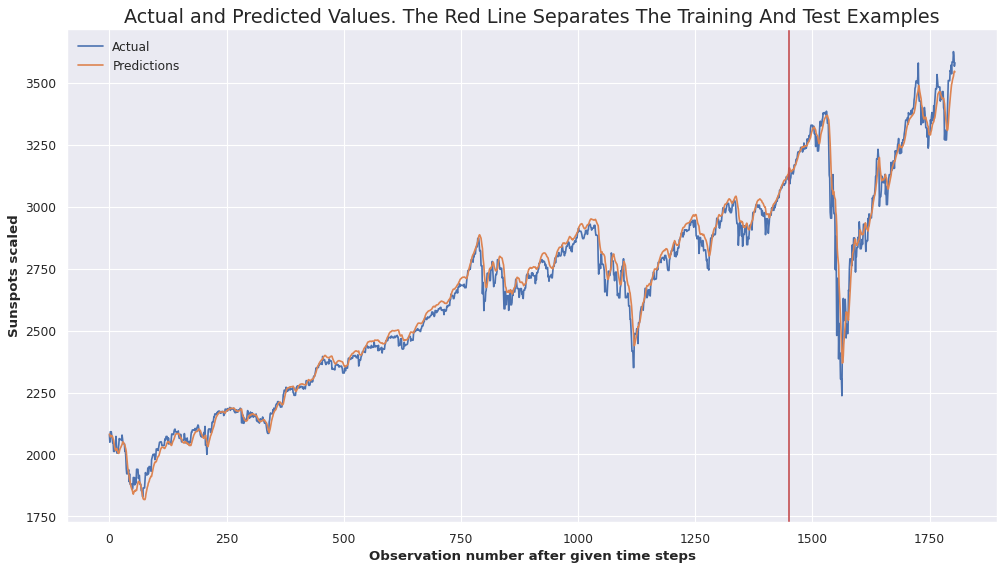

In [212]:
#Plot result
plot_result(trainY, testY, trainPredict, testPredict)

In [213]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 35.78 RMSE
Test Score: 75.26 RMSE


In [214]:
# Reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [215]:
# Reshape input to be [samples, time steps, features].
trainX = np.reshape(trainX, (trainX.shape[0], 1,
                             trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,
                           testX.shape[1]))

In [216]:
# Reshape input to be [samples, time steps, features].
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

In [217]:
model_6 = Sequential()

model_6.add(LSTM(512, return_sequences=True,input_shape=(1, look_back)))
model_6.add(LSTM(256))
model_6.add(Dense(1))

print(model_6.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 1, 512)            1071104   
                                                                 
 lstm_23 (LSTM)              (None, 256)               787456    
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,858,817
Trainable params: 1,858,817
Non-trainable params: 0
_________________________________________________________________
None


In [218]:
model_6.compile(loss='mean_squared_error', optimizer='adam')
history = model_6.fit(trainX, trainY,
                    epochs=10, verbose=2,
                    shuffle=False, batch_size=25)

Epoch 1/10
58/58 - 4s - loss: 0.0025 - 4s/epoch - 78ms/step
Epoch 2/10
58/58 - 1s - loss: 0.0022 - 1s/epoch - 19ms/step
Epoch 3/10
58/58 - 1s - loss: 0.0010 - 1s/epoch - 20ms/step
Epoch 4/10
58/58 - 1s - loss: 5.5280e-04 - 1s/epoch - 20ms/step
Epoch 5/10
58/58 - 2s - loss: 4.9461e-04 - 2s/epoch - 27ms/step
Epoch 6/10
58/58 - 2s - loss: 4.7063e-04 - 2s/epoch - 37ms/step
Epoch 7/10
58/58 - 2s - loss: 4.3193e-04 - 2s/epoch - 30ms/step
Epoch 8/10
58/58 - 2s - loss: 4.4929e-04 - 2s/epoch - 34ms/step
Epoch 9/10
58/58 - 3s - loss: 4.2502e-04 - 3s/epoch - 46ms/step
Epoch 10/10
58/58 - 2s - loss: 4.7342e-04 - 2s/epoch - 33ms/step


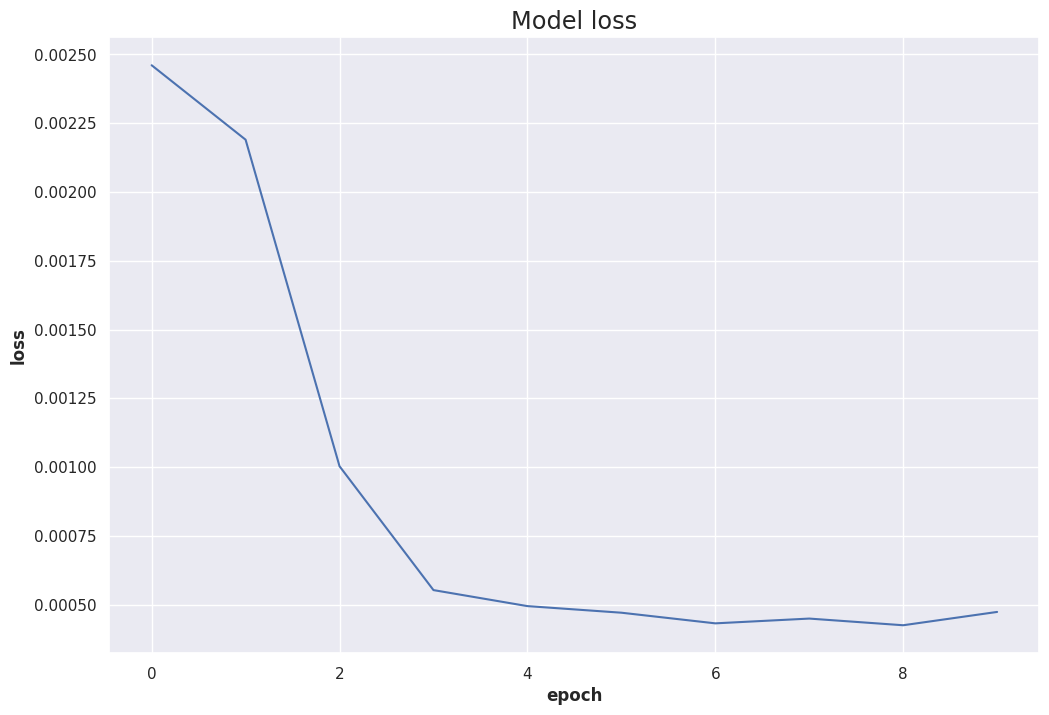

In [219]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [220]:
trainPredict = model_6.predict(trainX)
testPredict = model_6.predict(testX)

In [221]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)


In [222]:
trainY = scaler.inverse_transform(trainY)


In [223]:
testPredict = scaler.inverse_transform(testPredict)


In [224]:
testY = scaler.inverse_transform(testY)

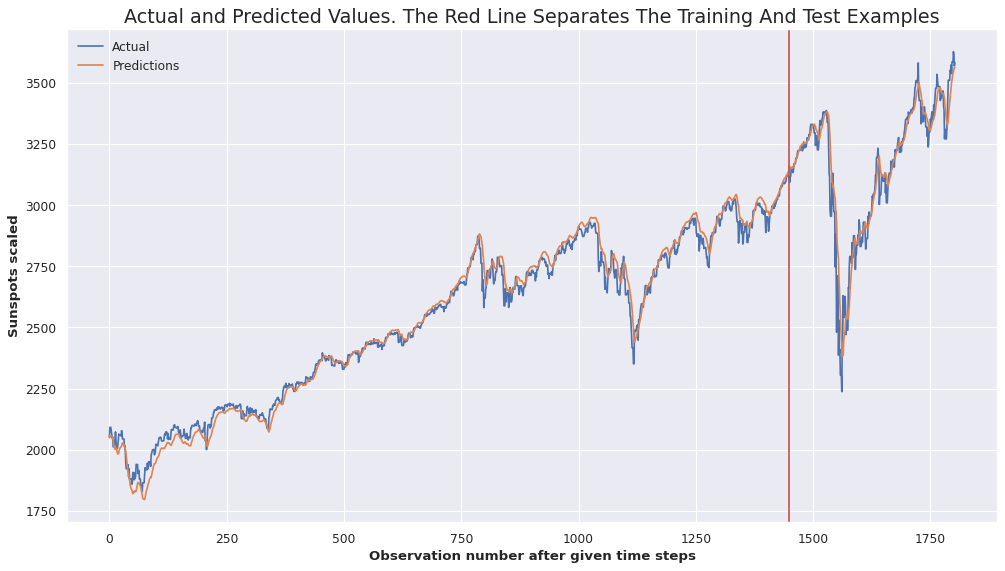

In [225]:
#Plot result
plot_result(trainY, testY, trainPredict, testPredict)

In [226]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 37.54 RMSE
Test Score: 77.41 RMSE
